### SVD (Singular Value Decomposition) 특이값 분해 P.396~
 - PCA 와 기본적으로 유사한 원리의 분해
 - 정방행렬 뿐 아니라, 행과 열의 크기가 다른 행렬에도 적용가능(m x n)

#### SVD 실습
- SVD 행렬 구조의 이해

In [2]:
# 원데이터(Random data) 생성 -> 분해 -> 복원
# SVD => numpy, sklearn
import numpy as np
import pandas as pd
from numpy.linalg import svd

In [24]:
# 랜덤 원본 데이터 임의로 생성  4 x 3
np.random.seed(121)
A = np.random.randn(4,4)  # 4 x 3 랜덤 행렬 a 생성
A = np.round(A,3)  # 반올림

A

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [25]:
A.shape

(4, 4)

In [26]:
# 행렬 B(A) 분해 => svd() function => return U, Sigma, Vt 세가지 원소를 튜플형태로 반환함
U, Sigma, Vt = svd(A)   # Full svd
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [31]:
U, Vt

(array([[-0.07921665, -0.31815613,  0.8666701 ,  0.37601108],
        [ 0.38286266,  0.78655539,  0.12009385,  0.46938713],
        [ 0.65643647,  0.02254063,  0.35654115, -0.66442569],
        [ 0.6451605 , -0.52877143, -0.32762602,  0.44365515]]),
 array([[ 0.04107434,  0.22381748,  0.78638485, -0.57429739],
        [-0.20022039,  0.56218109,  0.37031656,  0.7118496 ],
        [-0.77853775,  0.39436417, -0.33259139, -0.3574057 ],
        [-0.59338324, -0.69161771,  0.36585171,  0.18898097]]))

In [30]:
# Sigma(대각행렬) 확인 : 원소 0이 제외된 대각행렬의 "특이값"만 1차원의 형태로 반환된다.
print('Sigma value : ', np.round(Sigma,3))    # Full svd 한 결과

Sigma value :  [3.423 2.023 0.462 0.079]


위의 대각행렬의 특이값중 3번째 원소부터 값이 급격히 낮아진다. 즉 1,2번 원소만 더 의미있어 보인다

In [43]:
# 원래 행렬 A로 복원하여 원본과 같은지 확인하기(SVD 분해 과정을 이해하기 위한 과정)
# Sigma 를 0 을 포함한 대칭행렬로 변환 후(np.diag()), 내적곱해야한다.
Sigma_mat = np.diag(Sigma)
print('###특이값만 포함된 대각행렬###\n ', Sigma,'\n')
print('###대칭행렬변환된 대각행렬### \n', Sigma_mat)

###특이값만 포함된 대각행렬###
  [3.42339408 2.02275037 0.4624853  0.07914071] 

###대칭행렬변환된 대각행렬### 
 [[3.42339408 0.         0.         0.        ]
 [0.         2.02275037 0.         0.        ]
 [0.         0.         0.4624853  0.        ]
 [0.         0.         0.         0.07914071]]


In [45]:
# np.dot() 내적곱하여 원본으로 돌리기
A_ = np.dot(np.dot(U, Sigma_mat),Vt)
print('원본데이터 A : \n', A, '\n')
print('복원데이터 A_ : \n', A_)

원본데이터 A : 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]] 

복원데이터 A_ : 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 원본과 복원데이터가 동일하다. 위 과정을 통해서 SVD 의 분해과정과 복원과정을 확인 할수있다
- 분해시 중요한 factor는 Sigma(대각행렬)의 특이값(0을 제외한 값)이다.

In [46]:
# 행렬의 주성분 추출이 잘되는지 확인하기 위한 예제
# 4*4 행렬에서 , idx2,3 번째 행렬은 0,1번째에서 파생된 어레이를 넣어준다. 즉 예상되는 주성분은 A[0], A[1]이 출력

A[2] = A[0] + A[1]
A[3] = A[0]
print(np.round(A,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [49]:
U, Sigma, Vt = svd(A)
print('Sigma Value : \n', np.round(Sigma,3))

Sigma Value : 
 [2.663 0.807 0.    0.   ]


- 중요 feature 인 0, 1번째의 특이값만 검출되었고, 이에서 파생된 데이터인 2,3 번째는 0이 출력되었다.
- 즉 0에 가까운 Sigma value 는 무시해서 작업할 수도 있다.
- =>  Compact SVD, Truncated SVD 활용 => 중요한 피처는 유지하면서, 피처의 개수 감소시킬수있다.

In [50]:
# 복원 : Compact SVD 적용, (위에서 0인 특이값인 부분 제거하여 복원)
U_ = U[:, :2]
U_

array([[ 0.24572687,  0.5827678 ],
       [-0.77441764, -0.01665291],
       [-0.52869077,  0.56611489],
       [ 0.24572687,  0.5827678 ]])

In [53]:
Sigma_ = np.diag(Sigma[:2])
Sigma_

array([[2.66316116, 0.        ],
       [0.        , 0.80666452]])

In [55]:
Vt_ = Vt[:2, :]
Vt_

array([[ 0.16443617, -0.57535677, -0.78220802, -0.17342416],
       [-0.67987663,  0.19468142, -0.13213211, -0.69455598]])

In [58]:
A_ = np.dot(np.dot(U_, Sigma_), Vt_)
print('## 원본행렬 ## \n', A , '\n')
print('## compact SVD 적용한 복원 ## \n', A_)

## 원본행렬 ## 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]] 

## compact SVD 적용한 복원 ## 
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 축소된 값으로도 완벽하게 복원되었다.

### compact SVD 적용한 복원은, 특징을 극대화시켜서 복원한것으로, 개념이해 매우 중요하다
- 이러한 복원방식이 페이스 ID 가 얼굴을 인식하는 과정의 방식과 동일하다.
- CNN의 신경망(Neural Net)에서 내부적으로 돌아가는 방식이기도 하다.
- 오토인코더의 원리이기도 하다

### Truncated SVD 를 이용한 행렬 분해
- scipy 이용(p.401~)
    - from scipy.sparse.linalg import svds  # svds : Truncated
    - from scipy.linalg import svd

- sklearn 이용(p.402~)
    - from sklearn.decomposition import TruncatedSVD
    - fit, transform 지원

In [78]:
# 사이킷런 Truncated SVD 클래스를 이용한 분해
# iris dataset 이용,
# PCA 랑 비교

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
# 피처 4개
iris_ftrs = iris.data
iris_ftrs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
# 4개의 피처를 2개로 축소(Truncated SVD 사용)
# 2개의 주요 성분으로 변환
tsvd = TruncatedSVD(n_components=2)   # n_components => R 값(하이퍼 파라미터) 상위 R개의 피처만 남기고 나머지는 지운다.
tsvd.fit(iris_ftrs) # 식 생성
iris_tsvd = tsvd.transform(iris_ftrs)
print('변환전 차원 \n', iris_ftrs.shape)
print('변환된 차원 \n', iris_tsvd.shape)
# 2차원으로 줄었다.

변환전 차원 
 (150, 4)
변환된 차원 
 (150, 2)


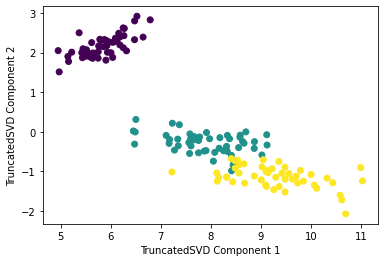

In [77]:
plt.scatter(
      x=iris_tsvd[:,0]  # 첫번째 피처
    , y=iris_tsvd[:,1]  # 두번째 피처
    , c=iris.target     # 결과 값을 색으로 표현
)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

- 2개의 피처만으로도 꽤 분류가 잘되어있다.

Text(0.5, 1.0, 'PCA Transformed')

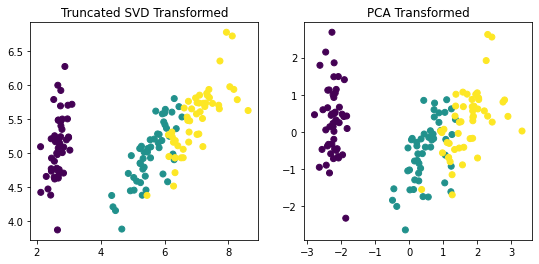

In [80]:
# 데이터 정규화(스케일링) 후 다시 비교
# TruncatedSVD, PCA 비교 시각화(n_component = 2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# TrunctaedSVD 적용
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_ftrs)  # 차원 축소한 새로운 피처 데이터

# PCA 적용
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)  # 차원 축소한 새로운 피처 데이터

# 시각화
figure, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0]
            ,y=iris_tsvd[:,1]
            ,c=iris.target
           )
ax2.scatter(x=iris_pca[:,0]
        ,y=iris_pca[:,1]
        , c=iris.target
           )
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
                                            

- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면, SVD 와 PCA는 동일한 변환을 수행한다.
- 거의 동일하다. 즉 PCA 가 SVD 알고리즘으로 구현되어있음을 의미한다.


## 05. NMF(Non-Negative Matrix Fatorization, 비음수 행렬분해)  p. 405~
- 하나의 배열을 비음수(양수)로만 구성된 두개의 배열로 분해

In [81]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'NMF Transformed')

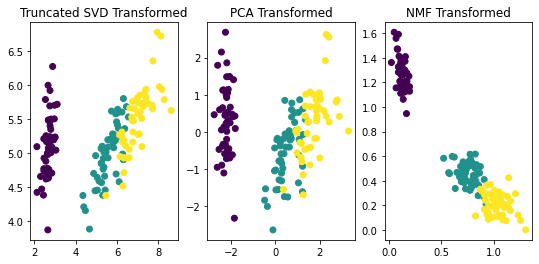

In [89]:
iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

# 시각화
figure, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3)
ax1.scatter(x=iris_tsvd[:,0]
            ,y=iris_tsvd[:,1]
            ,c=iris.target
           )
ax2.scatter(x=iris_pca[:,0]
        ,y=iris_pca[:,1]
        , c=iris.target
           )
ax3.scatter(x=iris_nmf[:,0]
           ,y=iris_nmf[:,1]
           ,c=iris.target
           )
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
ax3.set_title('NMF Transformed')

- NMF 는 출력되는 새로운 피처값(2개의 배열) 자체가 모두 양수로만 구성되어 있다.